# QC - Census Data Custom Plotting Functions Demonstration

In [22]:
from devqc.plots import *
from devqc.survey import *

In [23]:
import pandas as pd
import time as time
import seaborn as sns
from matplotlib import pyplot as plt
import csv
from scipy import stats
import copy
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from IPython.display import display, HTML

CSS = """
div.cell:nth-child(39) .output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))


In [4]:
#read in csv files - aboriginal DA
y2018 = pd.read_csv('2018_da_abor.csv')
y2019 = pd.read_csv('2019_da_abor.csv')


#distribution data - DA age female
y2018d = pd.read_csv('2018_da_agef.csv')
y2019d =pd.read_csv('2019_da_agef.csv')


In [5]:
#creat input list
listvars = list(y2019)
listvars.remove('CODE')
listvars

['AITOT', 'AIABOR', 'AINABOR']

## Function 1 - Scatter plot for continuous variables

Function 1 is used to create scatter plots with 2 tables (dataframes) by providing one list of variables. The same variable from each dataframe is used. The parameters are as follows:

 1. **lists**: a list of variables that will be used for both dataframes
 2. **df_new**: dataframe 1 - ideally a table from current year
 3. **df_old**: dataframe 2 - ideally a table from previous year
 4. **Normalized**: As a percentage distribution or non-normalized
 5. **Placements**: Grouped bar plots, Split vertical facet, Line plot
 6. **Sample Size**: Specify number of geography units to use

### Inputs for Function 1

In [6]:
#input for function 1
display(y2019.head())
display(y2018.head())

,CODE,AITOT,AIABOR,AINABOR
0,10010165,515,19,496
1,10010166,328,0,328
2,10010167,442,41,401
3,10010168,531,11,520
4,10010169,317,0,317


,CODE,AITOT,AIABOR,AINABOR
0,10010165,567,30,537
1,10010166,327,12,315
2,10010167,447,5,442
3,10010168,550,20,530
4,10010169,315,7,308


### Output for Function 1

Add linear trend







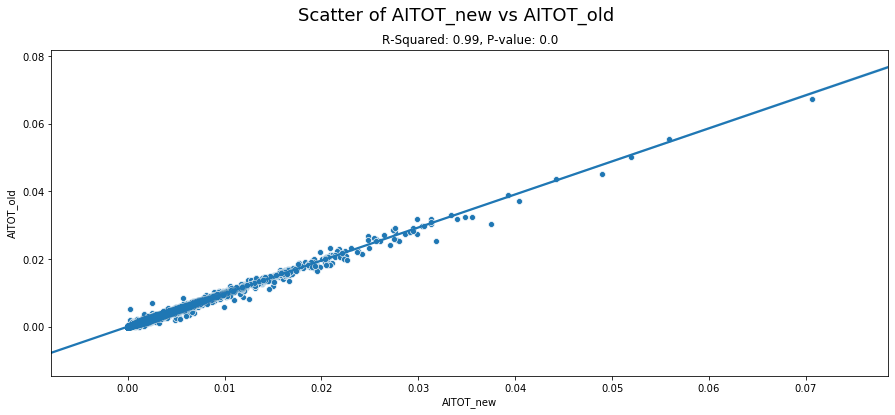

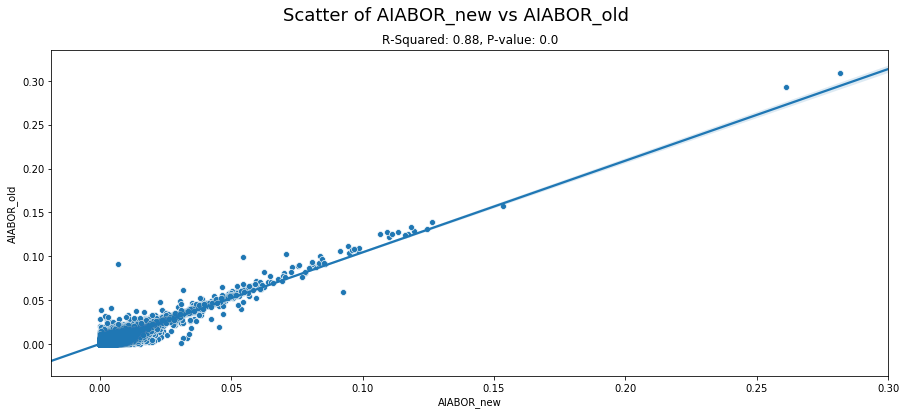

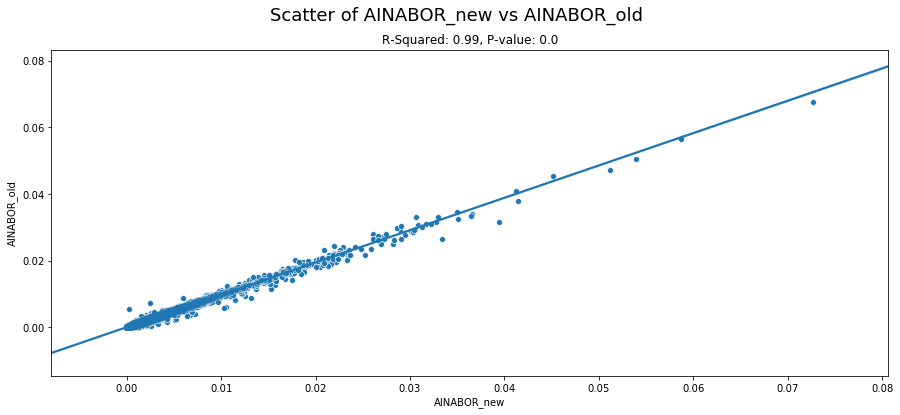

,CODE,AITOT_new,AIABOR_new,AINABOR_new,AITOT_old,AIABOR_old,AINABOR_old
0,10010165,0.001401,0.001040,0.001420,0.001559,0.001824,0.001546
1,10010166,0.000892,0.000000,0.000939,0.000899,0.000730,0.000907
2,10010167,0.001203,0.002245,0.001148,0.001229,0.000304,0.001273
3,10010168,0.001445,0.000602,0.001489,0.001512,0.001216,0.001526
4,10010169,0.000863,0.000000,0.000908,0.000866,0.000426,0.000887
5,10010170,0.001097,0.001533,0.001074,0.001089,0.001399,0.001074
6,10010171,0.001331,0.000766,0.001360,0.001342,0.000669,0.001373
7,10010172,0.000620,0.000109,0.000647,0.000621,0.000486,0.000628
8,10010173,0.002468,0.000493,0.002571,0.002485,0.001155,0.002548
9,10010174,0.002403,0.003175,0.002362,0.002510,0.005230,0.002381


In [9]:
qc7_plots.one_df_scatter_cont3(listvars,y2019,y2018,'CODE', normalized=True, linear_trend=True)

In [62]:
y2019["AITOT"] = np.log10(y2019["AITOT"] ) 
y2019['AIABOR'] = np.log10(y2019['AIABOR'])
y2019["AINABOR"] = np.log10(y2019["AINABOR"])


y2018["AITOT"] = np.log10(y2018["AITOT"] ) 
y2018['AIABOR'] = np.log10(y2018['AIABOR'])
y2018["AINABOR"] = np.log10(y2018["AINABOR"])

No linear trend







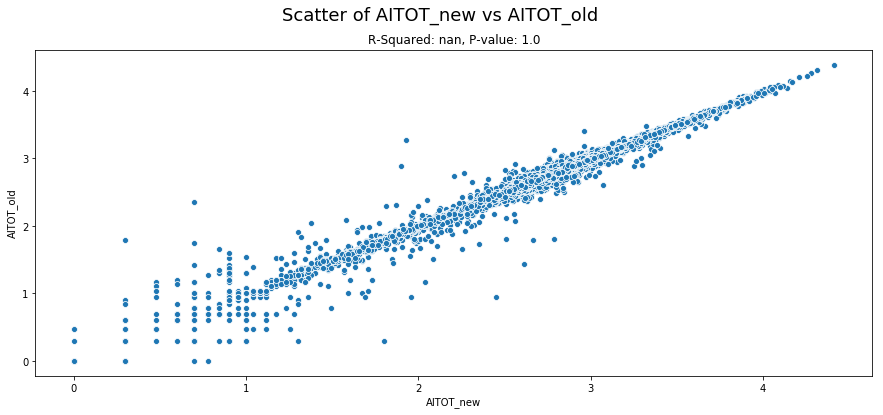

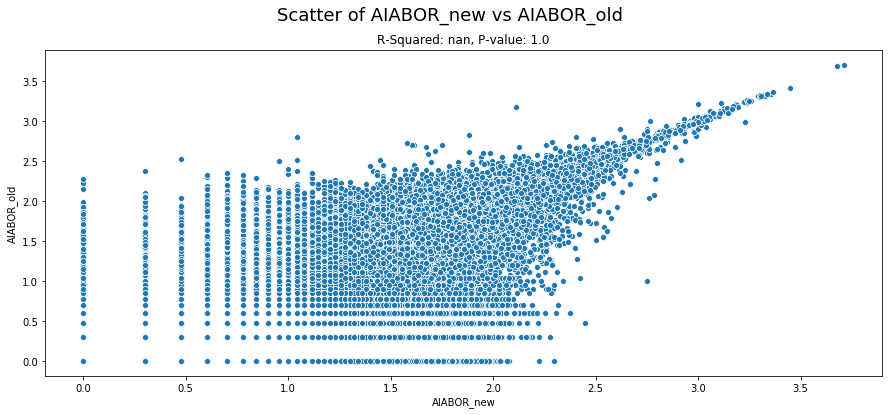

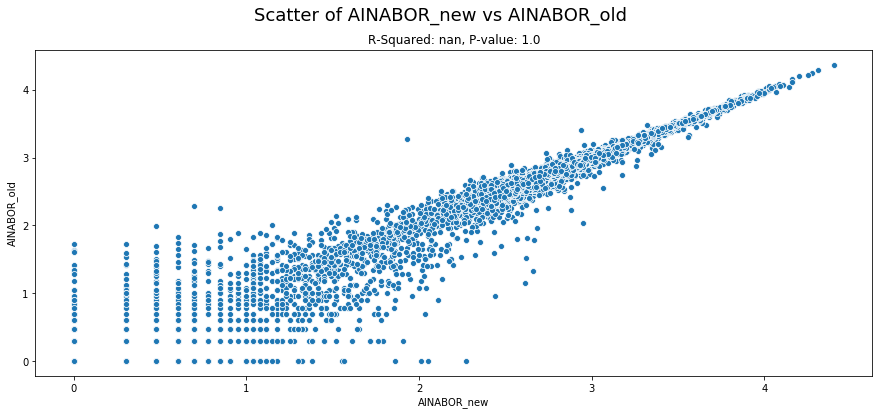

,CODE,AITOT_new,AIABOR_new,AINABOR_new,AITOT_old,AIABOR_old,AINABOR_old
0,10010165,2.711807,1.278754,2.695482,2.753583,1.477121,2.729974
1,10010166,2.515874,-inf,2.515874,2.514548,1.079181,2.498311
2,10010167,2.645422,1.612784,2.603144,2.650308,0.698970,2.645422
3,10010168,2.725095,1.041393,2.716003,2.740363,1.301030,2.724276
4,10010169,2.501059,-inf,2.501059,2.498311,0.845098,2.488551
5,10010170,2.605305,1.447158,2.574031,2.597695,1.361728,2.571709
6,10010171,2.689309,1.146128,2.676694,2.688420,1.041393,2.678518
7,10010172,2.357935,0.301030,2.354108,2.354108,0.903090,2.338456
8,10010173,2.957607,0.954243,2.953276,2.956168,1.278754,2.946943
9,10010174,2.945961,1.763428,2.916454,2.960471,1.934498,2.917506


In [63]:
qc7_plots.one_df_scatter_cont3(listvars,y2019,y2018,'CODE', normalized=False, linear_trend=False)

## Function  2 - Distribution Plotting for two dataframes

Function 2 is used to create plots for distribution variables for two dataframes. The variables from the two dataframes need to match as no list is requested from the user. This function takes a sample of geographies for comparison. There are also options for:

 1. **df_new**: dataframe 1 - ideally a table from current year
 2. **df_old**: dataframe 2 - ideally a table from previous year
 3. **Difference**: Compute the difference in values between the variable in df_new and df_old. Can be normalized as well.
 4. **Normalized**: As a percentage distribution or non-normalized
 5. **Placements**: Grouped bar plots, Split vertical facet, Line plot
 6. **Sample Size**: Specify number of geography units to use




### Inputs for Function 2

In [10]:
#input for function 2
display(y2019d.head())
display(y2018d.head())

,CODE,PFTOT,PF0004,PF0509,PF1014,PF1519,PF2024,PF2529,PF3034,PF3539,PF4044,PF4549,PF5054,PF5559,PF6064,PF6569,PF7074,PF7579,PF8084,PF85P
0,10010165,262,5,6,8,13,15,23,14,14,15,11,22,26,30,26,17,6,7,4
1,10010166,159,3,3,3,8,10,13,7,9,8,7,10,14,17,17,15,7,6,2
2,10010167,222,6,8,9,13,15,15,7,10,14,10,14,20,24,26,19,6,3,3
3,10010168,270,9,13,9,11,14,20,11,18,17,15,19,20,25,26,21,9,7,6
4,10010169,141,4,5,6,6,11,13,6,6,7,5,12,16,13,12,9,3,3,4


,CODE,PFTOT,PF0004,PF0509,PF1014,PF1519,PF2024,PF2529,PF3034,PF3539,PF4044,PF4549,PF5054,PF5559,PF6064,PF6569,PF7074,PF7579,PF8084,PF85P
0,10010165,262,5,5,8,14,15,25,14,14,14,11,24,26,31,24,15,5,8,4
1,10010166,161,4,2,3,10,10,13,7,9,8,7,10,15,17,16,15,7,6,2
2,10010167,221,6,8,9,14,15,14,6,11,15,9,14,22,24,26,17,4,3,4
3,10010168,270,8,14,8,11,15,20,11,19,16,16,19,21,25,26,20,9,6,6
4,10010169,141,4,5,6,5,13,13,5,6,7,5,14,17,12,12,8,2,3,4


### Output for Function 1

,CODE,diff_PFTOT,diff_PF0004,diff_PF0509,diff_PF1014,diff_PF1519,diff_PF2024,diff_PF2529,diff_PF3034,diff_PF3539,diff_PF4044,diff_PF4549,diff_PF5054,diff_PF5559,diff_PF6064,diff_PF6569,diff_PF7074,diff_PF7579,diff_PF8084,diff_PF85P
27512,35210473,0.187617,-5.555556,-2.380952,0.000000,-2.777778,2.439024,-7.142857,-5.000000,-2.500000,2.127660,0.0,1.351351,4.477612,5.000000,-3.174603,4.411765,1.886792,0.0,15.151515
33207,35340146,0.273224,3.703704,0.000000,13.333333,-4.545455,6.666667,0.000000,-5.882353,6.666667,-5.555556,0.0,-5.000000,0.000000,-4.347826,-3.846154,4.545455,0.000000,0.0,3.571429


        CODE     variable      value
0   35210473   diff_PFTOT   0.187617
2   35210473  diff_PF0004  -5.555556
4   35210473  diff_PF0509  -2.380952
6   35210473  diff_PF1014   0.000000
8   35210473  diff_PF1519  -2.777778
10  35210473  diff_PF2024   2.439024
12  35210473  diff_PF2529  -7.142857
14  35210473  diff_PF3034  -5.000000
16  35210473  diff_PF3539  -2.500000
18  35210473  diff_PF4044   2.127660
20  35210473  diff_PF4549   0.000000
22  35210473  diff_PF5054   1.351351
24  35210473  diff_PF5559   4.477612
26  35210473  diff_PF6064   5.000000
28  35210473  diff_PF6569  -3.174603
30  35210473  diff_PF7074   4.411765
32  35210473  diff_PF7579   1.886792
34  35210473  diff_PF8084   0.000000
36  35210473   diff_PF85P  15.151515


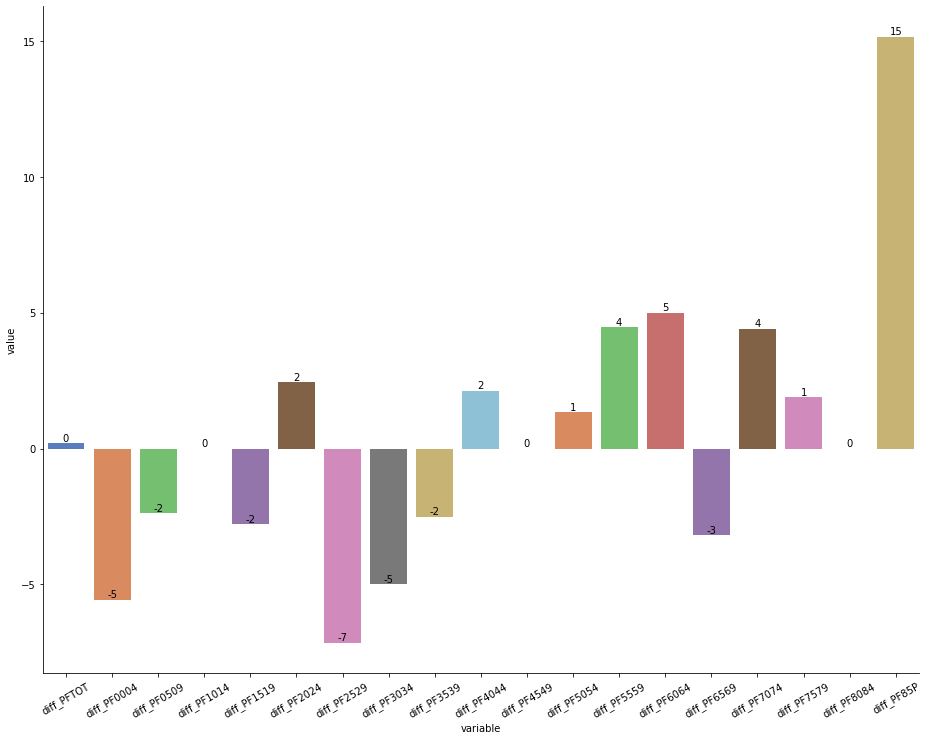

        CODE     variable      value
1   35340146   diff_PFTOT   0.273224
3   35340146  diff_PF0004   3.703704
5   35340146  diff_PF0509   0.000000
7   35340146  diff_PF1014  13.333333
9   35340146  diff_PF1519  -4.545455
11  35340146  diff_PF2024   6.666667
13  35340146  diff_PF2529   0.000000
15  35340146  diff_PF3034  -5.882353
17  35340146  diff_PF3539   6.666667
19  35340146  diff_PF4044  -5.555556
21  35340146  diff_PF4549   0.000000
23  35340146  diff_PF5054  -5.000000
25  35340146  diff_PF5559   0.000000
27  35340146  diff_PF6064  -4.347826
29  35340146  diff_PF6569  -3.846154
31  35340146  diff_PF7074   4.545455
33  35340146  diff_PF7579   0.000000
35  35340146  diff_PF8084   0.000000
37  35340146   diff_PF85P   3.571429


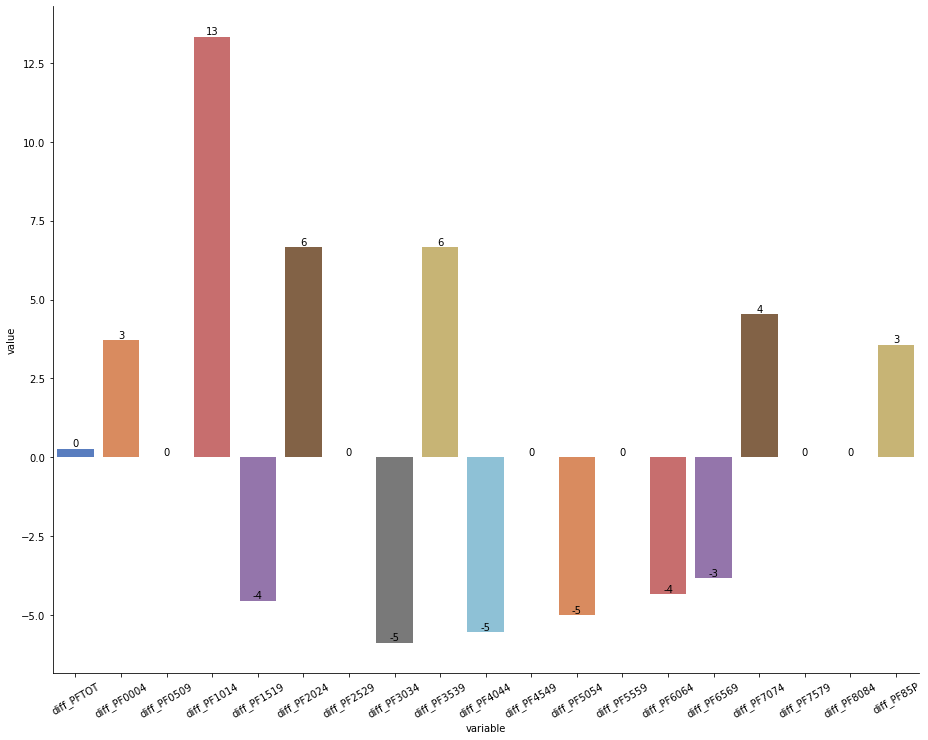

In [18]:
qc7_plots.distrib_plot_v2(y2019d,y2018d,'CODE', difference=True, normalized = True, placement='series', sample_size = 2)

## Function 3 - Box Plots and Histograms

Function 3 creates box plots and histograms for two dataframes with one list of variables provided. The same variables are used in each dataframe. Outliers are set to "False" by default, as this allows a better view of the bulk of the values. The parameters are as follows:

 1. **lists**: a list of variables that will be used for both dataframes
 2. **df_new**: dataframe 1 - ideally a table from current year
 3. **df_old**: dataframe 2 - ideally a table from previous year
 4. **join_field**: The field on which the dataframes are joined - ideally the geography field. A list can be provided for joins based on multiple columns.
 5. **show_outliers**: Outliers are omitted by default so that plots are zoomed to the bulk of the data. Can be turned on by providing "True" as an input value.


### Inputs for function 3

In [9]:
#input for function 3
display(y2019.head())

,CODE,AITOT,AIABOR,AINABOR
0,10010165,515,19,496
1,10010166,328,0,328
2,10010167,442,41,401
3,10010168,531,11,520
4,10010169,317,0,317


### Output for function 3

,CODE,AITOT_new,AIABOR_new,AINABOR_new,AITOT_old,AIABOR_old,AINABOR_old
0,10010165,515,19,496,567,30,537
1,10010166,328,0,328,327,12,315
2,10010167,442,41,401,447,5,442
3,10010168,531,11,520,550,20,530
4,10010169,317,0,317,315,7,308
5,10010170,403,28,375,396,23,373
6,10010171,489,14,475,488,11,477
7,10010172,228,2,226,226,8,218
8,10010173,907,9,898,904,19,885
9,10010174,883,58,825,913,86,827


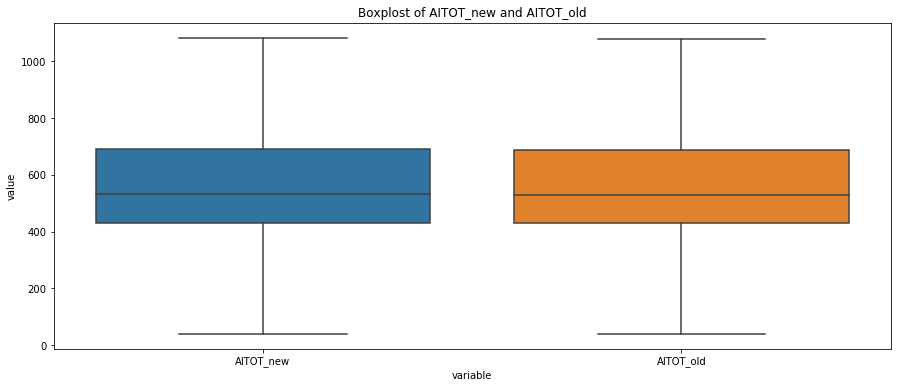

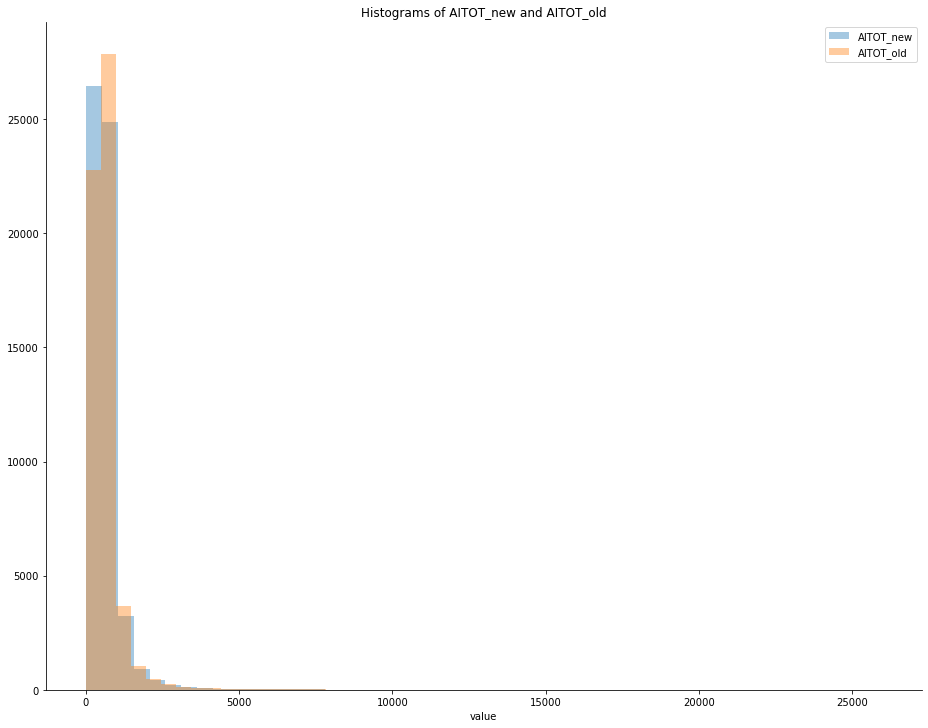

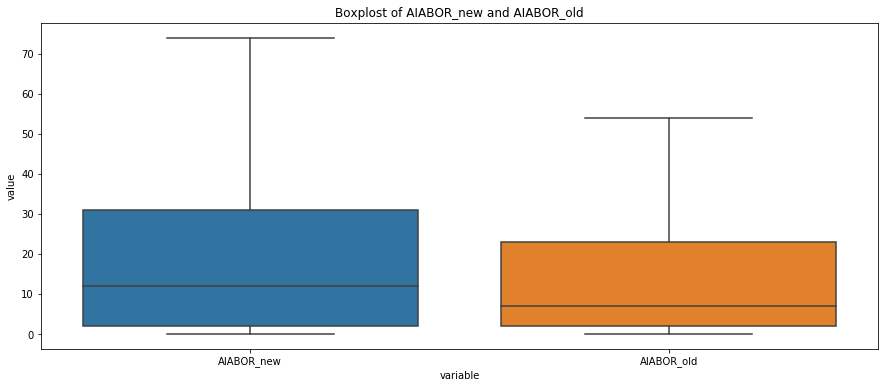

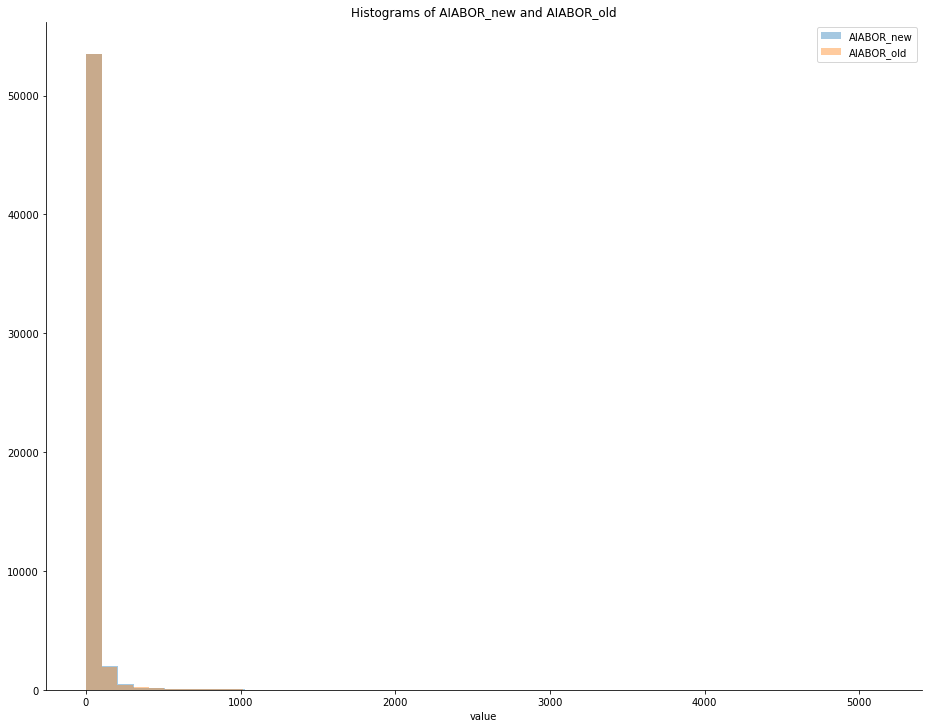

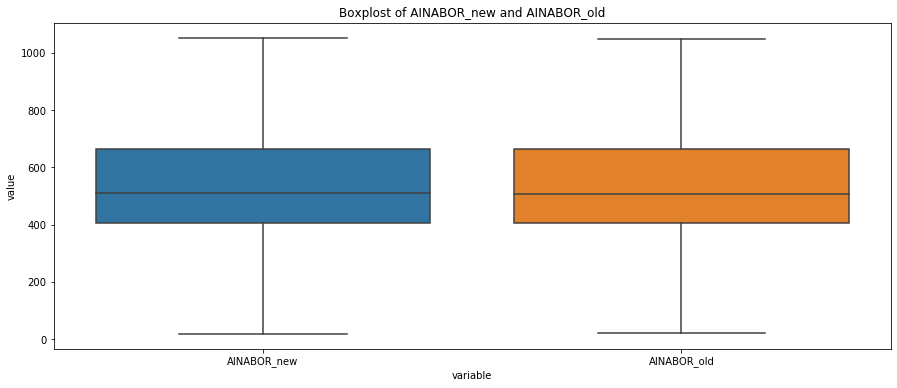

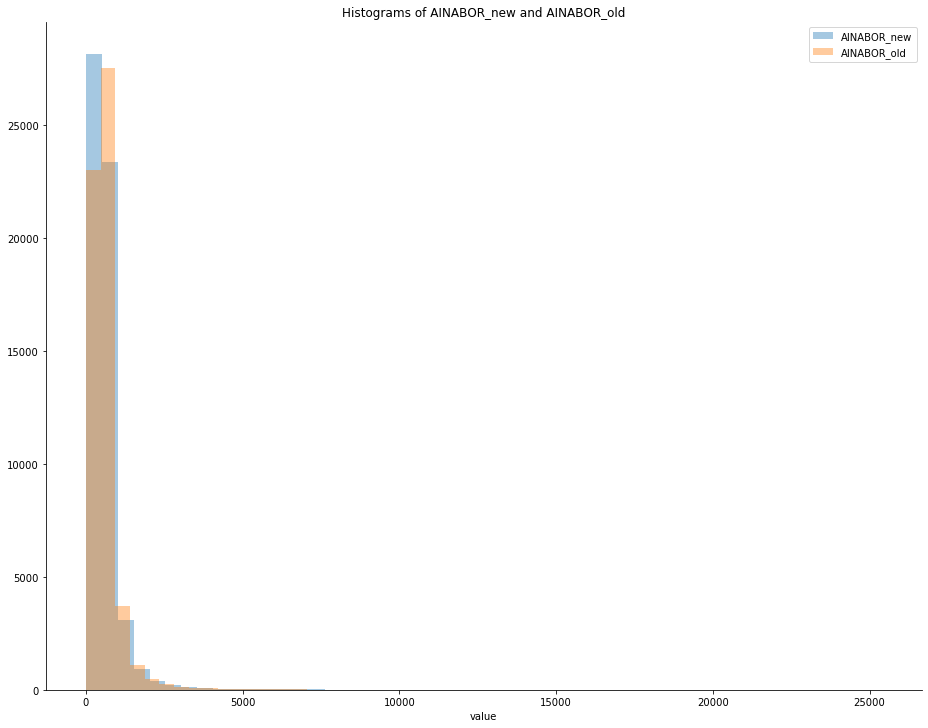

In [20]:
qc7_plots.box_n_hist_v2(listvars,y2019,y2018,'CODE', show_outliers=False)

## Function 4 - Distribution Plots for Normalized/Transposed Data


Function 4 accepts distribution data that is normalized (tranposed) to produce grouped bar and line plots. The function accepts the following parameters:

 1. **df** - the dataframe with distributional data in normalized/transposed fromat
 2. **X - axis**: The categorical breaks for the distribution (i.e. years, age groups, etc.)
 3. **Y - axis**: Numerical Values for plotting
 4. **Normalized**: Plotting the values as percentages
 5. **Placement**: Grouped bar plot, split vertical facet and line series can be specified
 6. **Subset**: If there is an additional geography column where units can be sampled from, subset can be set to any string or value (i.e. 'yes') this enables a user input prompt that requests the numbers of sample units to take and then the fieldname from which to sample from.

### Input for function 4

In [24]:
#input data for function 4
ws_df2 = pd.read_csv("wsct_subset.csv")
#ws_df2.Year = ws_df2.Year.astype(str)
ws_df2.head()

,Control,Region,Stream,Year,Value,Source,Notes
0,Investment Products - Short Term Paper,Canada,Interest,2003,5.218000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN
1,Investment Products - Short Term Paper,Canada,Interest,2004,3.416000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN
2,Investment Products - Short Term Paper,Canada,Interest,2005,2.382000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN
3,Investment Products - Short Term Paper,Canada,Interest,2006,4.821000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN
4,Investment Products - Short Term Paper,Canada,Interest,2007,4.998000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN


### Output for function 4

lineplots for days


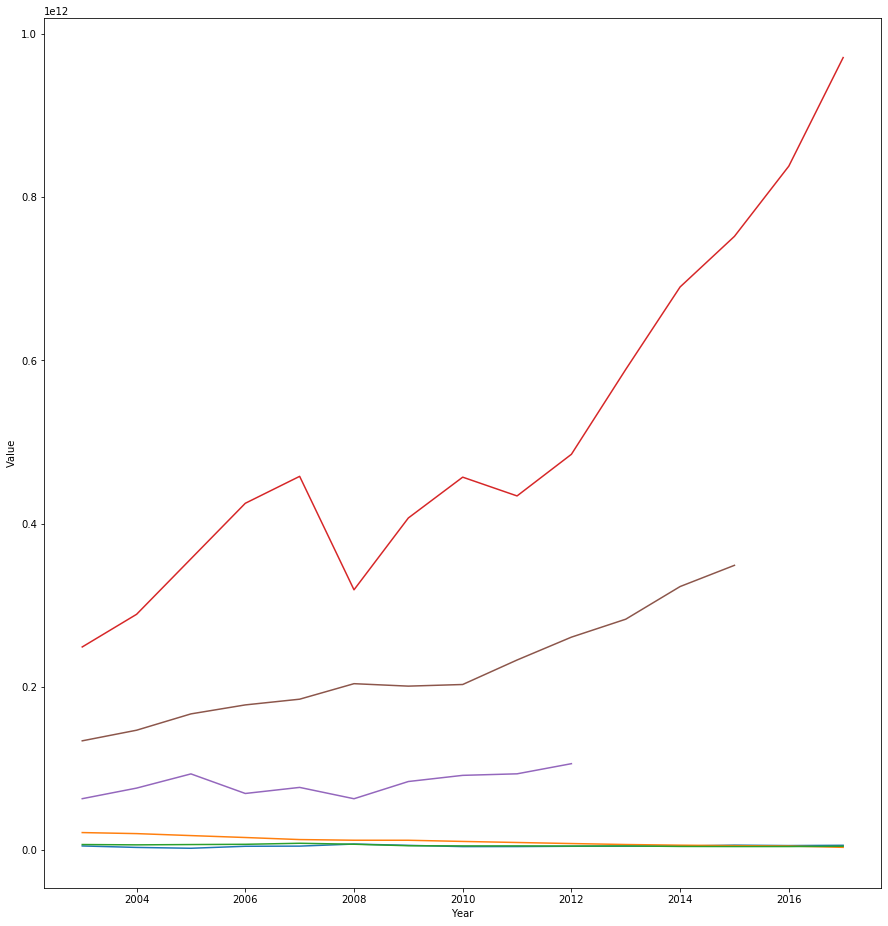

In [25]:
qc7_plots.one_df_distrib_v2(ws_df2, x_axis="Year", y_axis="Value", series="Control", normalized=False, placement="series")

,Control,Region,Stream,Year,Value,Source,Notes,diff,pct_diff,cumulative,interval
0,Investment Products - Short Term Paper,Canada,Interest,2003,5.218000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,NaN,NaN,5.218000e+09,nan-2003
1,Investment Products - Short Term Paper,Canada,Interest,2004,3.416000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,-1.802000e+09,-0.527518,8.634000e+09,2003.0-2004
2,Investment Products - Short Term Paper,Canada,Interest,2005,2.382000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,-1.034000e+09,-0.434089,1.101600e+10,2004.0-2005
3,Investment Products - Short Term Paper,Canada,Interest,2006,4.821000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,2.439000e+09,0.505912,1.583700e+10,2005.0-2006
4,Investment Products - Short Term Paper,Canada,Interest,2007,4.998000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,1.770000e+08,0.035414,2.083500e+10,2006.0-2007
5,Investment Products - Short Term Paper,Canada,Interest,2008,7.543000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,2.545000e+09,0.337399,2.837800e+10,2007.0-2008
6,Investment Products - Short Term Paper,Canada,Interest,2009,5.949000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,-1.594000e+09,-0.267944,3.432700e+10,2008.0-2009
7,Investment Products - Short Term Paper,Canada,Interest,2010,4.420000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,-1.529000e+09,-0.345928,3.874700e+10,2009.0-2010
8,Investment Products - Short Term Paper,Canada,Interest,2011,4.464000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,4.400000e+07,0.009857,4.321100e+10,2010.0-2011
9,Investment Products - Short Term Paper,Canada,Interest,2012,4.839000e+09,"Statistics Canada, National Balance Sheet (acc...",NaN,3.750000e+08,0.077495,4.805000e+10,2011.0-2012


Raw Values - lineplots


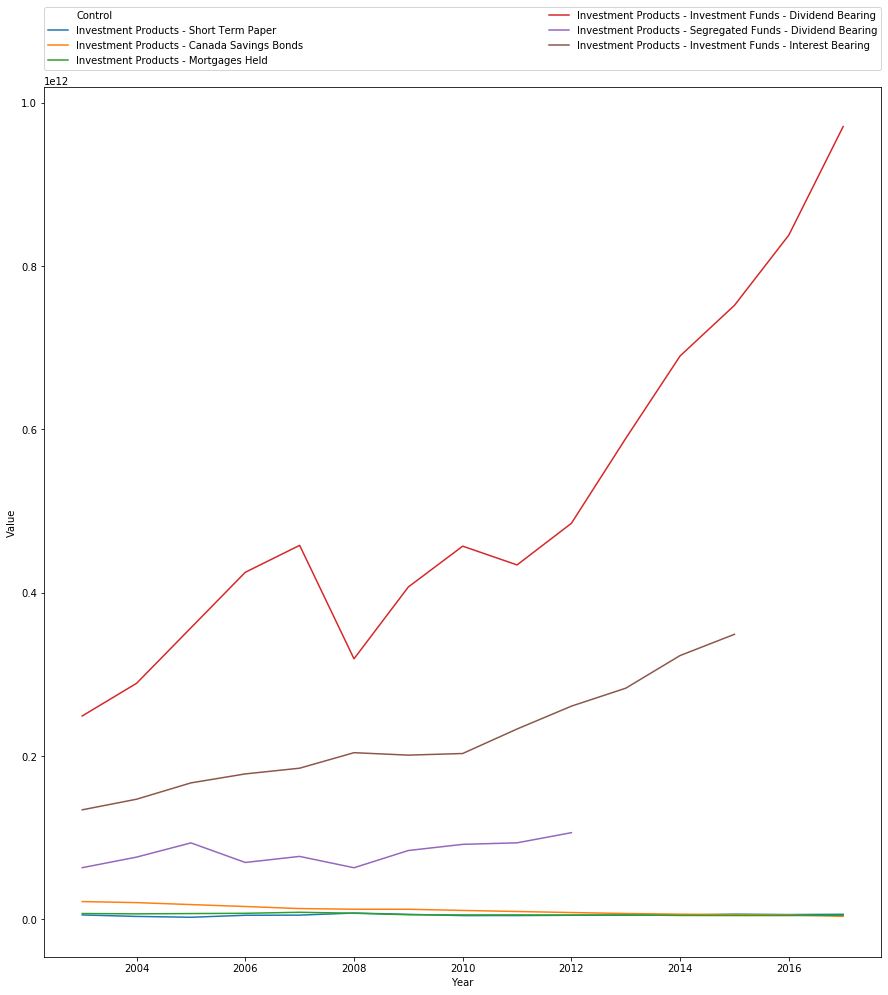

In [27]:
qc7_plots.one_df_distrib_v3(ws_df2,"Year","Value","Control", "series", "raw", universe="2003")

## Function 4 - Sampling Subset


Function 4 can also sample from a geography column akin to function 2 to draw sample units to create plots for. This is done by enabling the "subset" parameter.

### Input for function 4 with subsetting

In [13]:
#read in transposed data file
transposed = pd.read_csv("transposed.csv")
transposed.head()

,CODE,variable,value,Flag
0,24450149,PFTOT,235,new
1,35190482,PFTOT,148,new
2,35240816,PFTOT,298,new
3,35580476,PFTOT,282,new
4,48061189,PFTOT,249,new


### Output for function 4 with subsetting

Enter sample size number: 2
Sample size selected is:  2
Enter field name for sampling (i.e. Geography field) with no qoutations: CODE
Field selected is:  CODE


[24450149, 48130226]

nah bruh


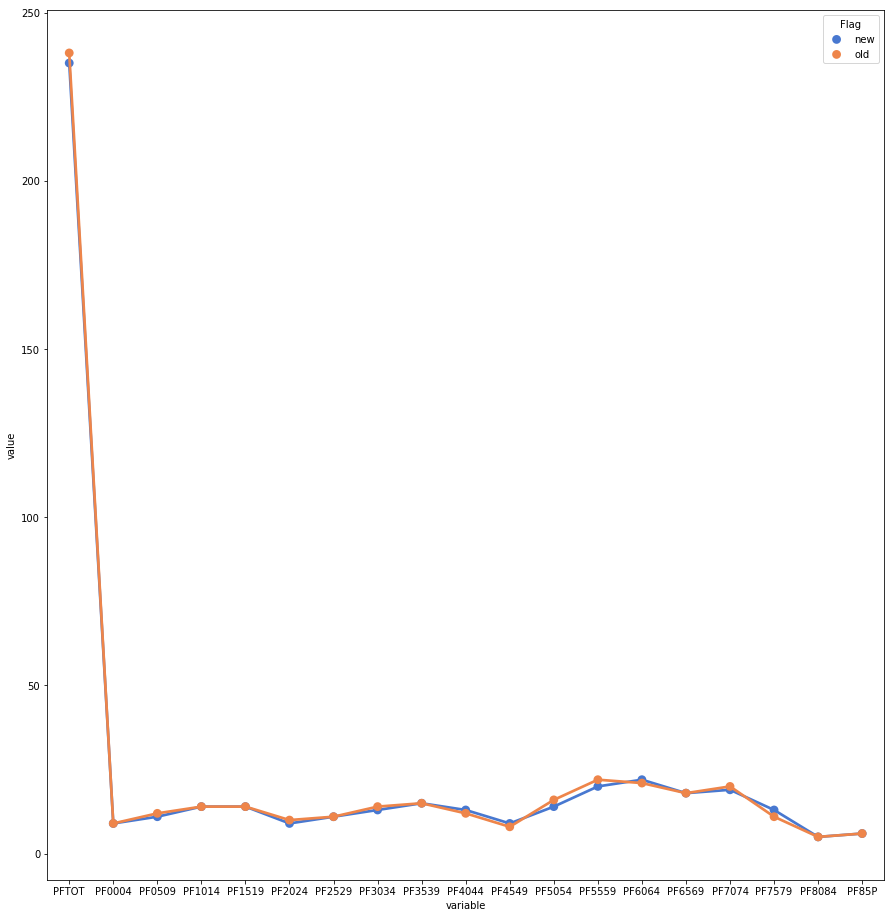

nah bruh


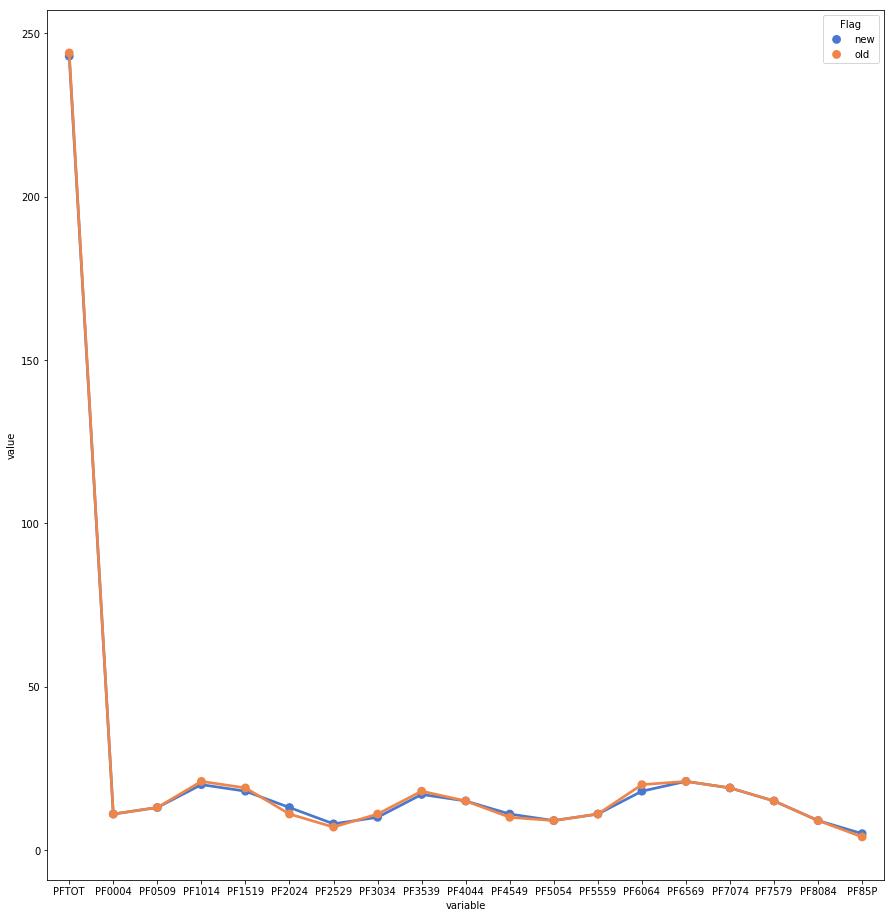

In [74]:
qc7_plots.one_df_distrib_v2(transposed, x_axis="variable", y_axis="value", series="Flag",normalized=False, 
                            placement ="series", subset="yes")